<a href="https://colab.research.google.com/github/johnmillstead/Coffee/blob/main/Coffee.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Coffee Pricing


In [35]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


# Load the data


In [36]:
from google.colab import files
uploaded = files.upload()


Saving coffeehistory.csv to coffeehistory (1).csv


In [37]:
# store the data
coffee = pd.read_csv('coffeehistory.csv')
#show the data
coffee

,date,value
0,8/20/73,0.6735
1,8/21/73,0.6710
2,8/22/73,0.6580
3,8/23/73,0.6675
4,8/24/73,0.6660
...,...,...
11886,1/21/21,1.2645
11887,1/22/21,1.2405
11888,1/25/21,1.2325
11889,1/26/21,1.2450


In [38]:
coffee.columns = coffee.columns.str.replace(' ', '') 

In [50]:
coffee['date'] = pd.to_datetime(coffee['date'])
coffee = coffee.set_index('date')

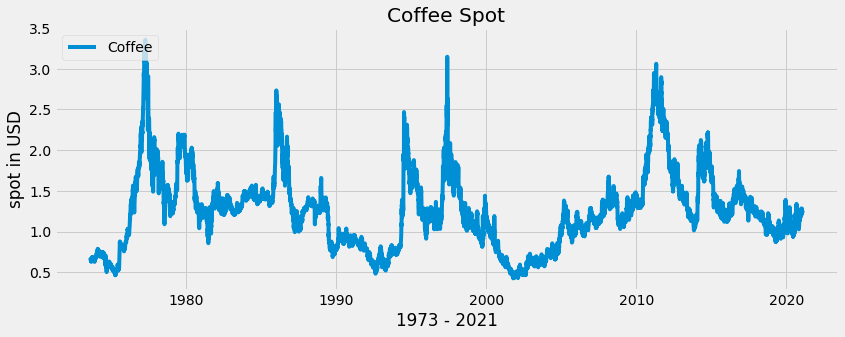

In [51]:
#visualize the data
plt.figure(figsize=(12.5, 4.5))
plt.plot(coffee['value'], label = 'Coffee')
plt.title('Coffee Spot')
plt.xlabel('1973 - 2021')
plt.ylabel('spot in USD')
plt.legend(loc='upper left')
plt.show()

In [52]:
#Create the simple moving average with a 30 day window
SMA30 = pd.DataFrame()
SMA30['price'] = coffee['value'].rolling(window =30).mean()


In [53]:
SMA30

,price
date,
1973-08-20,NaN
1973-08-21,NaN
1973-08-22,NaN
1973-08-23,NaN
1973-08-24,NaN
...,...
2021-01-21,1.245950
2021-01-22,1.248283
2021-01-25,1.249017


In [54]:
#Create a simple moving 100 day average
SMA100 = pd.DataFrame()
SMA100['price'] = coffee['value'].rolling(window=100).mean()

In [55]:
SMA100

,price
date,
1973-08-20,NaN
1973-08-21,NaN
1973-08-22,NaN
1973-08-23,NaN
1973-08-24,NaN
...,...
2021-01-21,1.171067
2021-01-22,1.170342
2021-01-25,1.169547


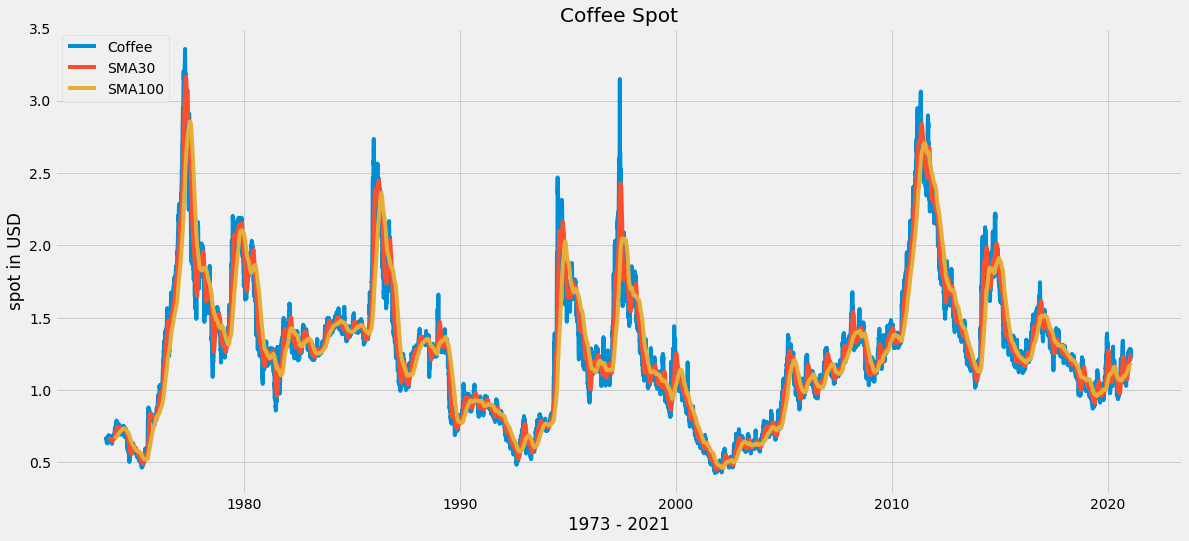

In [57]:
#visualize the data
plt.figure(figsize=(18, 8))
plt.plot(coffee['value'], label = 'Coffee')
plt.plot(SMA30['price'], label = 'SMA30')
plt.plot(SMA100['price'], label = 'SMA100')
plt.title('Coffee Spot')
plt.xlabel('1973 - 2021')
plt.ylabel('spot in USD')
plt.legend(loc='upper left')
plt.show()

In [58]:
#Create a new dataframe to store all of the data
data = pd.DataFrame()
data['coffee'] = coffee['value']
data['SMA30'] = SMA30['price']
data['SMA100'] = SMA100['price']

In [60]:
data.tail()

,coffee,SMA30,SMA100
date,,,
2021-01-21,1.2645,1.245950,1.171067
2021-01-22,1.2405,1.248283,1.170342
2021-01-25,1.2325,1.249017,1.169547
2021-01-26,1.2450,1.249983,1.168597
2021-01-27,1.2550,1.249767,1.167747


In [84]:
#create a function to signal when to buy and sell coffee
def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1

  for i in range(len(data)):
    if data['SMA30'][i] > data['SMA100'][i]:
      if flag != 1:
        sigPriceBuy.append(data['coffee'][i])
        sigPriceSell.append(np.nan)
        flag = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif data['SMA30'][i] < data['SMA100'][i]:
      if flag != 0:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(data['coffee'][i])
          flag = 0
      else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)
    else:
          sigPriceBuy.append(np.nan)
          sigPriceSell.append(np.nan)

  return (sigPriceBuy, sigPriceSell)

In [85]:
#store the buy and sell data into a variable
buy_sell = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell[0]
data['Sell_Signal_Price'] = buy_sell[1]

In [77]:
#show the data
data.isnull()

,coffee,SMA30,SMA100,Buy_Signal_Price,Sell_Signal_Price
date,,,,,
1973-08-20,False,True,True,True,True
1973-08-21,False,True,True,True,True
1973-08-22,False,True,True,True,True
1973-08-23,False,True,True,True,True
1973-08-24,False,True,True,True,True
...,...,...,...,...,...
2021-01-21,False,False,False,True,True
2021-01-22,False,False,False,True,True
2021-01-25,False,False,False,True,True


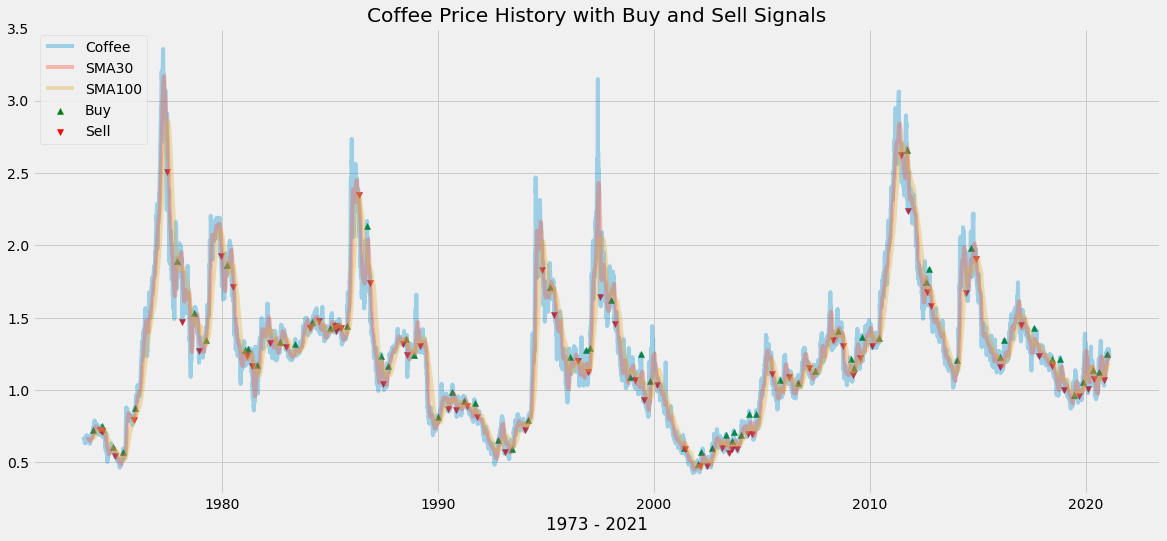

In [86]:
plt.figure(figsize=(18,8))
plt.plot(data['coffee'], label = 'Coffee', alpha = 0.35)
plt.plot(data['SMA30'], label = 'SMA30', alpha = 0.35)
plt.plot(data['SMA100'], label = 'SMA100', alpha = 0.35)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red')
plt.title('Coffee Price History with Buy and Sell Signals')
plt.xlabel('1973 - 2021')
plt.legend(loc='upper left')
plt.show()
